<a href="https://colab.research.google.com/github/Gautambusa4/OCR-OCV-using-YOLO-v8/blob/main/YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/225.8 GB disk)


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  /content/drive/MyDrive/YOLO v8_1

/content/drive/MyDrive/YOLO v8_1


In [ ]:
%cd /content/drive/MyDrive/YOLO v8_1

!yolo task=detect mode=train model=runs/detect/train/weights/best.pt data=data.yaml epochs=50 batch=5 plots=True patience=300 imgsz=700 save=True pretrained=True


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='/content/drive/MyDrive/TEST' save=data/test/results hide_conf=True conf=0.25 imgsz=440

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test save=runs/detect hide_conf=True save_txt=True 



In [ ]:
model = YOLO('runs/detect/train4/weights/best.pt')
results = model.predict(source='/content/drive/MyDrive/TEST/3.jpeg',conf=0.25,hide_conf=True)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 268 layers, 68144754 parameters, 0 gradients, 257.5 GFLOPs


Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 268 layers, 68144754 parameters, 0 gradients, 257.5 GFLOPs


{0: '/', 1: '.', 2: '0', 3: '1', 4: '2', 5: '3', 6: '4', 7: '5', 8: '6', 9: '7', 10: '8', 11: '9', 12: 'A', 13: 'B', 14: 'J', 15: 'K', 16: 'M', 17: 'N', 18: 'R', 19: 'S', 20: 'U', 21: 'Y'}
[246  61 282 100]
[211 102 246 139]
[208  66 243 104]
[270 127 307 163]
[216  27 243  66]
[247  97 285 136]
[ 94  80 129 119]
[174  31 211  71]
[136  36 174  76]
[ 93 153 128 189]
[135 114 170 150]
[133  75 168 114]
[169 140 204 177]
[ 95 117 132 156]
[132 146 167 183]
[231 131 268 170]
[175 110 207 143]
[254  23 281  62]
[ 98  40 134  82]
[172  72 205 105]
[207 158 223 178]


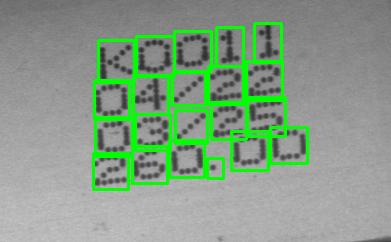

In [ ]:
import cv2
model = YOLO('runs/detect/train4/weights/best.pt')
# Set the confidence threshold for object detection
conf_thresh = 0.95
# Disable confidence display in bounding boxes
hide_conf = True
img = cv2.imread('/content/drive/MyDrive/YOLO v8_1/data/test/Inspection02092022_161514682.bmp')
results = model.predict(img, stream=True)
names=model.names 
print(names)              
# run prediction on img
for result in results:                                       
    boxes = result.boxes.cpu().numpy()                         # get boxes on cpu in numpy
    for box in boxes:                                          # iterate boxes
        r = box.xyxy[0].astype(int)                            # get corner points as int
        print(r)                                               # print boxes
        cv2.rectangle(img, r[:2], r[2:], (0,255,0), 2)   # draw boxes on img
# Display the output image
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

The processing time is 6.71177864074707 seconds.


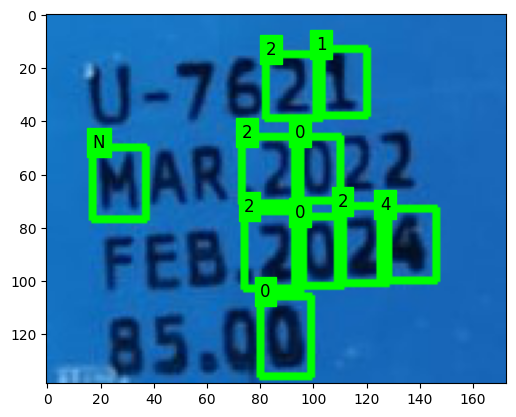

In [ ]:

import time
import matplotlib.pyplot as plt
import cv2
# Start the timer
start_time = time.time()

# Load the image
img = plt.imread('/content/drive/MyDrive/TEST/H.jpeg')

# Run prediction on the image
results = model.predict(img, stream=True,conf=0.25)

# Get the names of the classes
names = model.names

# Loop over the results
for result in results:
    # Get the boxes
    boxes = result.boxes.cpu().numpy()

    # Loop over the boxes
    for i in range(len(boxes)):
        # Get the corner points as int
        r = boxes[i].xyxy[0].astype(int)

        # Draw the bounding box on the image
        cv2.rectangle(img, r[:2], r[2:], (0, 255, 0), 2)

        # Get the class name
        cls = names[int(result.boxes.cls[i])]

        # Label the bounding box with the class name
        plt.text(r[0], r[1], cls, color='k', size=12, backgroundcolor=(0, 1, 0))

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Print the processing time
print("The processing time is", processing_time, "seconds.")

# Display the output image
plt.imshow(img)
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt
import cv2

# Start the timer
start_time = time.time()

# Load the image
img = plt.imread('/content/drive/MyDrive/YOLO v8_1/data/test/Inspection02122021_16055686.bmp')

# Run prediction on the image
results = model.predict(img, stream=True)

# Get the names of the classes
names = model.names

# Print the detected objects in a string format
detected_objects = []
for result in results:
    # Get the boxes
    boxes = result.boxes.cpu().numpy()

    # Loop over the boxes
    for i in range(len(boxes)):
        # Get the corner points as int
        r = boxes[i].xyxy[0].astype(int)

        # Get the class name
        cls = names[int(result.boxes.cls[i])]

        # Add the detected object to the list
        detected_objects.append(cls)

# Sort the detected objects in alphabetical order
sorted_detected_objects = sorted(detected_objects)

# Print the sorted detected objects
print("The detected objects are:", ", ".join(sorted_detected_objects))



The detected objects are: ., ., /, /, /, /, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 7, 9, 9, 9, B, N, R, S


In [ ]:
#OCV
import time
import matplotlib.pyplot as plt
import cv2

# Start the timer
start_time = time.time()

# Load the image
img = plt.imread('/content/A1.jpg')

# Run prediction on the image
results = model.predict(img, stream=True)

# Get the names of the classes
names = model.names

# Print the detected objects in a string format
detected_objects = []
for result in results:
    # Get the boxes
    boxes = result.boxes.cpu().numpy()

    # Loop over the boxes
    for i in range(len(boxes)):
        # Get the corner points as int
        r = boxes[i].xyxy[0].astype(int)

        # Get the class name
        cls = names[int(result.boxes.cls[i])]

        # Add the detected object to the list
        detected_objects.append(cls)

# Sort the detected objects in alphabetical order
sorted_detected_objects = sorted(detected_objects)

# Print the sorted detected objects
print("The detected objects are:", ", ".join(sorted_detected_objects))

# Get the string to compare
string = "., ., /, /, /, /, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 7, 9, 9, 9, B, N, R, S"

# Compare the strings
if string == ", ".join(sorted_detected_objects):
    # Print "Pass"
    cv2.putText(img, "PASS", (250, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
else:
    # Print "Fail"
    cv2.putText(img, "FAIL", (250, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)

# Display the image
plt.imshow(img)
plt.show()


(array([222,  19, 250,  57]), tensor(3.)) 1
(array([141,  21, 177,  58]), tensor(2.)) 0
(array([184,  22, 210,  56]), tensor(3.)) 1
(array([103,  23, 138,  59]), tensor(2.)) 0
(array([ 63,  24, 101,  61]), tensor(15.)) K
(array([208,  58, 248,  94]), tensor(4.)) 2
(array([169,  59, 208,  94]), tensor(4.)) 2
(array([ 94,  61, 131,  98]), tensor(6.)) 4
(array([132,  62, 170,  91]), tensor(0.)) /
(array([56, 63, 92, 96]), tensor(2.)) 0
(array([207,  93, 247, 130]), tensor(7.)) 5
(array([168,  95, 208, 130]), tensor(4.)) 2
(array([ 55,  99,  91, 134]), tensor(2.)) 0
(array([ 94,  99, 129, 132]), tensor(5.)) 3
(array([131,  99, 170, 127]), tensor(0.)) /
(array([226, 125, 266, 160]), tensor(2.)) 0
(array([187, 127, 226, 162]), tensor(2.)) 0
(array([126, 128, 161, 164]), tensor(2.)) 0
(array([ 87, 131, 122, 164]), tensor(8.)) 6
(array([ 48, 132,  85, 166]), tensor(4.)) 2
(array([161, 147, 177, 166]), tensor(1.)) .
The processing time is 3.778486728668213 seconds.


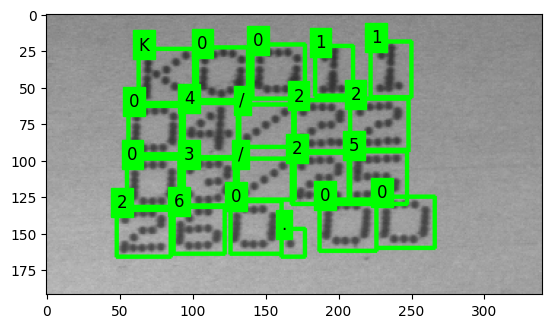

In [ ]:

import time
import matplotlib.pyplot as plt
import cv2

# Start the timer
start_time = time.time()

# Load the image
img = plt.imread('/content/drive/MyDrive/YOLO v8_1/data/test/Inspection02092022_16410794.bmp')

# Run prediction on the image
results = model.predict(img, stream=True)

# Get the names of the classes
names = model.names

# Create a list to store the rois
rois = []

# Loop over the results
for result in results:
    # Get the boxes
    boxes = result.boxes.cpu().numpy()

    # Loop over the boxes
    for i in range(len(boxes)):
        # Get the corner points as int
        r = boxes[i].xyxy[0].astype(int)
        
        # Add the roi to the list
        rois.append((r,result.boxes.cls[i]))

# Sort the rois from left to right and top to bottom
#rois.sort(key=lambda x: x[0][0])
rois.sort(key=lambda x: (x[0][1], x[0][0]))
# Get the first row of rois
first_row = [roi for roi in rois if roi[0][1] == 0]

# Get the second row of rois
second_row = [roi for roi in rois if roi[0][1] == 1]




# Loop over the rois
for roi in rois:
    # Draw the bounding box on the image
    cv2.rectangle(img, roi[0][:2], roi[0][2:], (0, 255, 0), 2)

    # Get the class name
    cls = names[int(roi[1])]
        # Print the roi and the class name
    print(roi, cls)

    # Label the bounding box with the class name
    plt.text(roi[0][0], roi[0][1], cls, color='k', size=12, backgroundcolor=(0, 1, 0))

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Print the processing time
print("The processing time is", processing_time, "seconds.")

# Display the output image
plt.imshow(img)
plt.show()

cv2.destroyAllWindows()
